Analyzing Human Rights Issues in Kenya


In [225]:
# Import the necessary Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [227]:
# Load the dataset

data = pd.read_csv(r"C:\Users\Keith Lucas\Documents\human_rights_kenya.csv")
data

,Date,Region,Issue,Victims,Responsible Party
0,3/28/2019,Eldoret,Gender-Based Violence,50,Police
1,8/8/2020,Mombasa,Human Trafficking,86,Government
2,8/4/2023,Garissa,Displacement,7,Police
3,9/13/2023,Lamu,Labor Rights Violation,29,Government
4,12/17/2020,Lamu,Protest Suppression,91,Community
...,...,...,...,...,...
4995,11/6/2023,Garissa,Unlawful Detention,72,Community
4996,5/3/2021,Nakuru,Protest Suppression,15,Unknown
4997,3/27/2019,Garissa,Labor Rights Violation,49,Private Sector
4998,2/26/2018,Eldoret,Unlawful Detention,55,Government


In [229]:
# Display basic info

print(data.info())
print(data.head())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               5000 non-null   object
 1   Region             5000 non-null   object
 2   Issue              5000 non-null   object
 3   Victims            5000 non-null   int64 
 4   Responsible Party  5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB
None
         Date   Region                   Issue  Victims Responsible Party
0   3/28/2019  Eldoret   Gender-Based Violence       50            Police
1    8/8/2020  Mombasa       Human Trafficking       86        Government
2    8/4/2023  Garissa            Displacement        7            Police
3   9/13/2023     Lamu  Labor Rights Violation       29        Government
4  12/17/2020     Lamu     Protest Suppression       91         Community


In [231]:
#Provides summary statistics for numerical columns (e.g., mean, std, min, max).

data.describe()




,Victims
count,5000.000000
mean,50.231000
std,29.103928
min,1.000000
25%,25.000000
50%,50.000000
75%,76.000000
max,100.000000


In [233]:
# Includes both numerical and categorical columns in the summary.

data.describe(include='all')

,Date,Region,Issue,Victims,Responsible Party
count,5000,5000,5000,5000.000000,5000
unique,2706,10,10,NaN,5
top,1/21/2019,Nakuru,Displacement,NaN,Private Sector
freq,7,531,537,NaN,1040
mean,NaN,NaN,NaN,50.231000,NaN
std,NaN,NaN,NaN,29.103928,NaN
min,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,25.000000,NaN
50%,NaN,NaN,NaN,50.000000,NaN
75%,NaN,NaN,NaN,76.000000,NaN


In [235]:
#  Lists all column names.

print(data.columns)


Index(['Date', 'Region', 'Issue', 'Victims', 'Responsible Party'], dtype='object')


In [237]:
# Displays data types for each column.

print(data.dtypes)


Date                 object
Region               object
Issue                object
Victims               int64
Responsible Party    object
dtype: object


In [239]:
# Returns the number of unique values in each column.

print(data.nunique())


Date                 2706
Region                 10
Issue                  10
Victims               100
Responsible Party       5
dtype: int64


In [241]:
# Displays the first n rows 

print(data.head(10))


         Date   Region                   Issue  Victims Responsible Party
0   3/28/2019  Eldoret   Gender-Based Violence       50            Police
1    8/8/2020  Mombasa       Human Trafficking       86        Government
2    8/4/2023  Garissa            Displacement        7            Police
3   9/13/2023     Lamu  Labor Rights Violation       29        Government
4  12/17/2020     Lamu     Protest Suppression       91         Community
5  11/19/2020   Nakuru       Human Trafficking       95           Unknown
6   8/25/2016  Eldoret             Child Labor       20            Police
7    3/9/2017  Mombasa      Unlawful Detention        6        Government
8   10/1/2018  Nairobi       Human Trafficking       34        Government
9   1/25/2016     Lamu   Gender-Based Violence       57            Police


In [243]:
# Displays the last n rows

print(data.tail(10))


            Date   Region                   Issue  Victims Responsible Party
4990   8/24/2015  Mombasa      Unlawful Detention        5    Private Sector
4991   7/13/2017  Garissa       Human Trafficking       41        Government
4992    6/2/2024  Turkana   Gender-Based Violence       97         Community
4993   12/6/2017   Nakuru         Forced Eviction       21            Police
4994   2/25/2023    Nyeri   Extrajudicial Killing       30            Police
4995   11/6/2023  Garissa      Unlawful Detention       72         Community
4996    5/3/2021   Nakuru     Protest Suppression       15           Unknown
4997   3/27/2019  Garissa  Labor Rights Violation       49    Private Sector
4998   2/26/2018  Eldoret      Unlawful Detention       55        Government
4999  10/17/2024  Nairobi            Displacement       10           Unknown


In [245]:
# Displays a random sample of n rows.

print(data.sample(5))


           Date   Region                Issue  Victims Responsible Party
2303   8/5/2020   Nakuru      Forced Eviction       47    Private Sector
2308  9/23/2022  Eldoret         Displacement       39           Unknown
4071  4/18/2024  Nairobi         Displacement       10         Community
3119  4/30/2021    Nyeri  Protest Suppression        1           Unknown
530    8/6/2021    Nyeri   Unlawful Detention       25            Police


In [247]:
# Returns a tuple (rows, columns) indicating the dimensions of the DataFrame.

print(data.shape)


(5000, 5)


In [249]:
# Returns the total number of elements (rows × columns).

print(data.size)


25000


In [251]:
# Check for missing values:

print(data.isnull().sum())


Date                 0
Region               0
Issue                0
Victims              0
Responsible Party    0
dtype: int64


In [253]:
# Handle missing data (if any):

data.fillna(data.bfill(), inplace=True)
print(data)

            Date   Region                   Issue  Victims Responsible Party
0      3/28/2019  Eldoret   Gender-Based Violence       50            Police
1       8/8/2020  Mombasa       Human Trafficking       86        Government
2       8/4/2023  Garissa            Displacement        7            Police
3      9/13/2023     Lamu  Labor Rights Violation       29        Government
4     12/17/2020     Lamu     Protest Suppression       91         Community
...          ...      ...                     ...      ...               ...
4995   11/6/2023  Garissa      Unlawful Detention       72         Community
4996    5/3/2021   Nakuru     Protest Suppression       15           Unknown
4997   3/27/2019  Garissa  Labor Rights Violation       49    Private Sector
4998   2/26/2018  Eldoret      Unlawful Detention       55        Government
4999  10/17/2024  Nairobi            Displacement       10           Unknown

[5000 rows x 5 columns]


In [255]:
# Identifies duplicate rows.

data.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [257]:
# Counts unique values in a specific column.

print(data['Region'].value_counts())


Region
Nakuru      531
Mombasa     516
Machakos    515
Eldoret     506
Kisumu      499
Nyeri       498
Lamu        496
Nairobi     492
Garissa     483
Turkana     464
Name: count, dtype: int64


In [259]:
# Displays relative frequencies (percentages).

print(data['Issue'].value_counts(normalize=True))


Issue
Displacement              0.1074
Censorship                0.1058
Protest Suppression       0.1028
Unlawful Detention        0.1016
Gender-Based Violence     0.1004
Forced Eviction           0.1004
Child Labor               0.0978
Human Trafficking         0.0960
Extrajudicial Killing     0.0948
Labor Rights Violation    0.0930
Name: proportion, dtype: float64


In [261]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
numeric_data = data.select_dtypes(include=['number'])
print(numeric_data.corr())




         Victims
Victims      1.0


In [263]:
# Displays memory usage of each column.

print(data.memory_usage())


Index                  132
Date                 40000
Region               40000
Issue                40000
Victims              40000
Responsible Party    40000
dtype: int64


In [265]:
#  Includes memory usage of objects (e.g., strings).

print(data.memory_usage(deep=True))


Index                   132
Date                  40000
Region               277001
Issue                327439
Victims               40000
Responsible Party    291349
dtype: int64


In [267]:
# Data Analysis
# a. Most Common Violations

violation_counts = data['Issue'].value_counts()
print(violation_counts)




Issue
Displacement              537
Censorship                529
Protest Suppression       514
Unlawful Detention        508
Gender-Based Violence     502
Forced Eviction           502
Child Labor               489
Human Trafficking         480
Extrajudicial Killing     474
Labor Rights Violation    465
Name: count, dtype: int64


In [269]:
# b. Regional Analysis

regional_violations = data.groupby('Region')['Victims'].sum().sort_values(ascending=False)
print(regional_violations)

Region
Nakuru      27022
Nyeri       25465
Eldoret     25349
Mombasa     25152
Nairobi     24890
Lamu        24877
Kisumu      24819
Machakos    24753
Garissa     24541
Turkana     24287
Name: Victims, dtype: int64


In [271]:
# c. Yearly Trends
# Extract the year and analyze:

data['Year'] = data['Date'].dt.year
yearly_trends = data.groupby('Year')['Victims'].sum()
print(yearly_trends)



Year
2015    25946
2016    26137
2017    24326
2018    25355
2019    26838
2020    24931
2021    25480
2022    25670
2023    25871
2024    20601
Name: Victims, dtype: int64


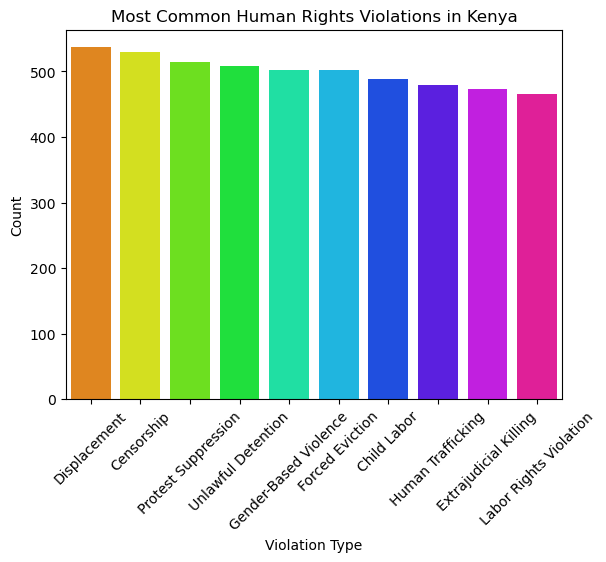

In [273]:
# Visualizations
# a. Bar Plot of Most Common Violations

# Create a DataFrame for the plot
import pandas as pd

violation_data = pd.DataFrame({
    'Violation Type': violation_counts.index,
    'Count': violation_counts.values
})

# Plot the barplot using hue and assign unique colors
sns.barplot(
    data=violation_data,
    x='Violation Type',
    y='Count',
    hue='Violation Type',  # Use hue for the colors
    dodge=False,           # Prevent grouped bars
    palette=colors         # Assign the color palette
)

# Adjust plot labels and formatting
plt.title('Most Common Human Rights Violations in Kenya')
plt.ylabel('Count')
plt.xlabel('Violation Type')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Remove the redundant legend
plt.show()



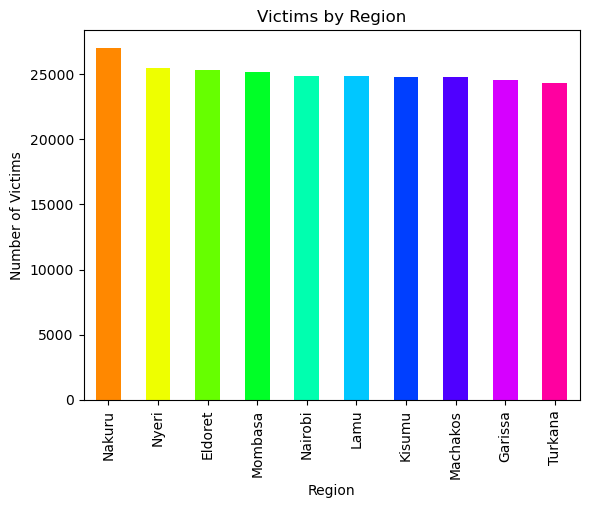

In [275]:
# b. Regional Violations

# Generate a unique color palette
colors = sns.color_palette("hsv", len(regional_violations))

# Plot the bar chart with unique colors for each bar
regional_violations.plot(
    kind='bar', 
    color=colors, 
    title='Victims by Region'
)
plt.ylabel('Number of Victims')
plt.xlabel('Region')
plt.show()



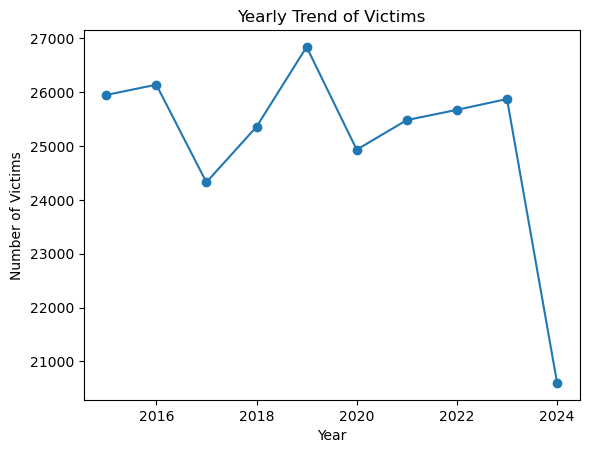

In [277]:
# c. Yearly Trends

yearly_trends.plot(kind='line', marker='o', title='Yearly Trend of Victims')
plt.ylabel('Number of Victims')
plt.show()


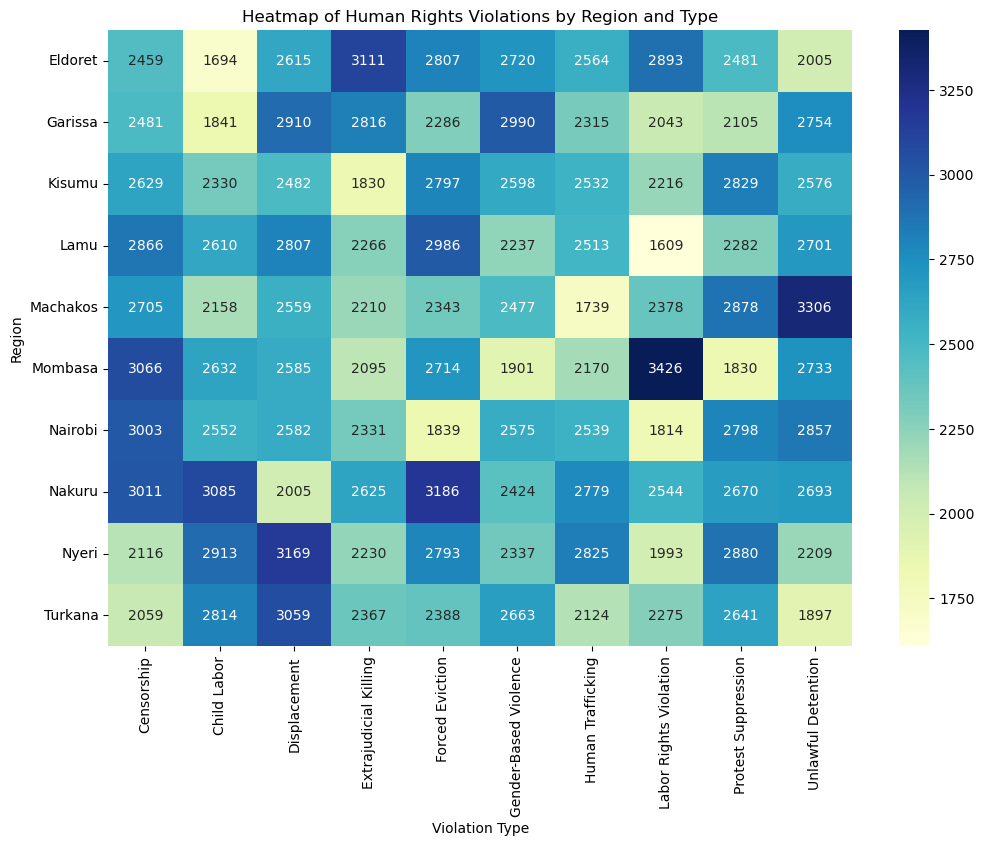

In [279]:
# Show the distribution of violations by region and type.

# Create a pivot table for the heatmap
heatmap_data = data.pivot_table(index='Region', columns='Issue', values='Victims', aggfunc='sum', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Human Rights Violations by Region and Type')
plt.xlabel('Violation Type')
plt.ylabel('Region')
plt.show()


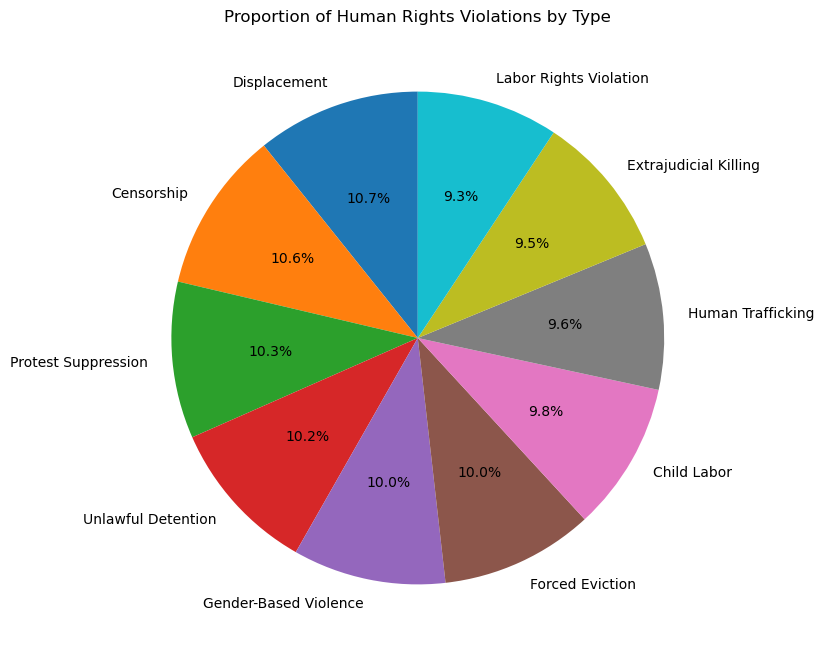

In [280]:
# Visualize the percentage share of different violation types.

# Aggregate data by violation type
issue_counts = data['Issue'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(issue_counts, labels=issue_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("tab10"))
plt.title('Proportion of Human Rights Violations by Type')
plt.show()


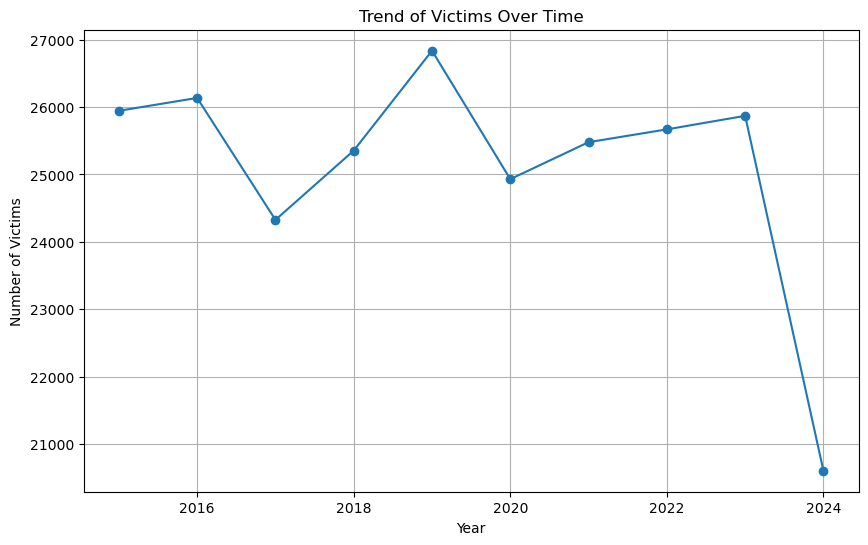

In [283]:
#  Identify trends in the number of victims over time.

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Aggregate data by year
data['Year'] = data['Date'].dt.year
yearly_trends = data.groupby('Year')['Victims'].sum()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_trends.index, yearly_trends.values, marker='o')
plt.title('Trend of Victims Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.grid()
plt.show()


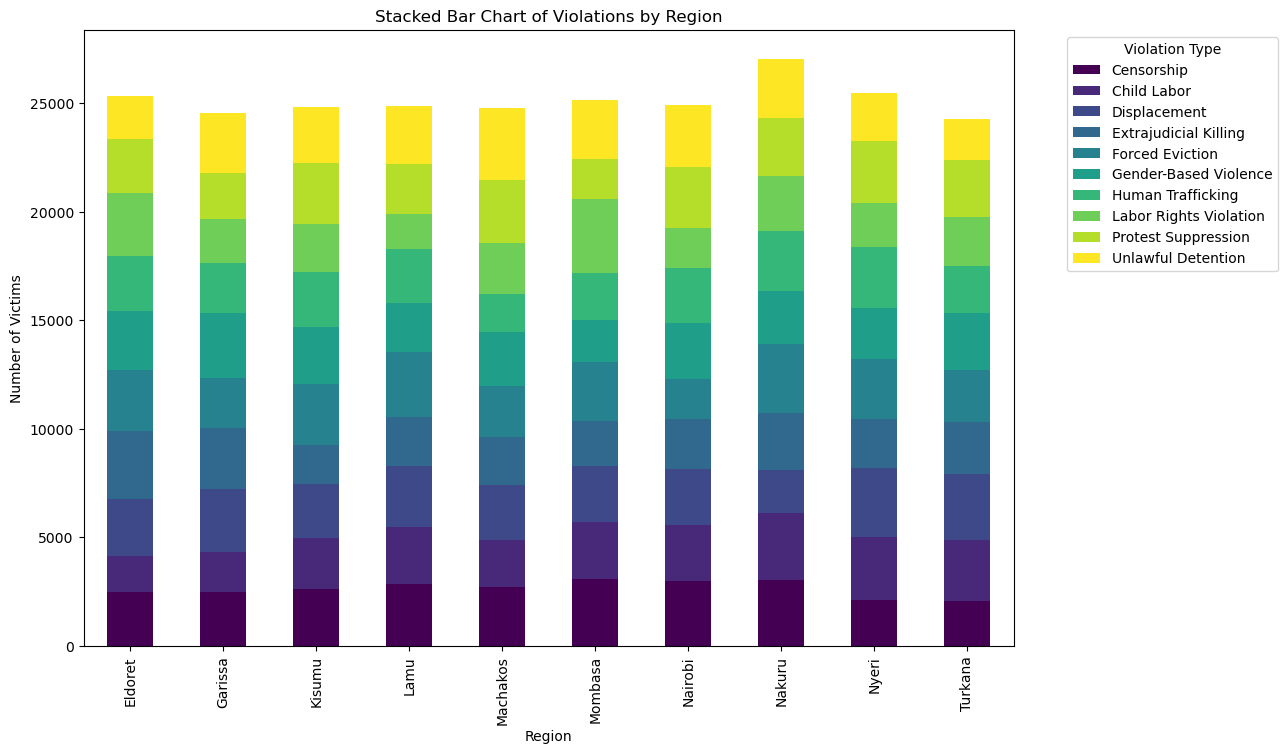

In [285]:
# Highlight how different types of violations are distributed across regions.

# Aggregate data by region and issue
stacked_data = data.pivot_table(index='Region', columns='Issue', values='Victims', aggfunc='sum', fill_value=0)

# Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Stacked Bar Chart of Violations by Region')
plt.ylabel('Number of Victims')
plt.xlabel('Region')
plt.legend(title='Violation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


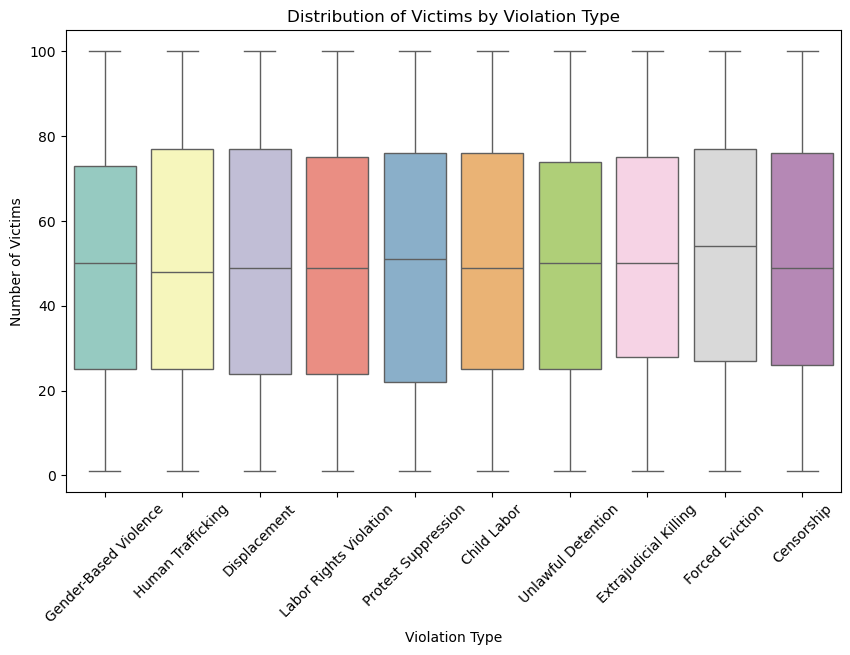

In [286]:
# Analyze the spread and outliers in the number of victims for each violation type.

plt.figure(figsize=(10, 6))

# Assign the `x` variable (`Issue`) to `hue` and disable the legend
sns.boxplot(x='Issue', y='Victims', data=data, palette='Set3', hue='Issue', dodge=False)

plt.title('Distribution of Victims by Violation Type')
plt.xticks(rotation=45)
plt.xlabel('Violation Type')
plt.ylabel('Number of Victims')
plt.legend([], [], frameon=False)  # Remove redundant legend
plt.show()



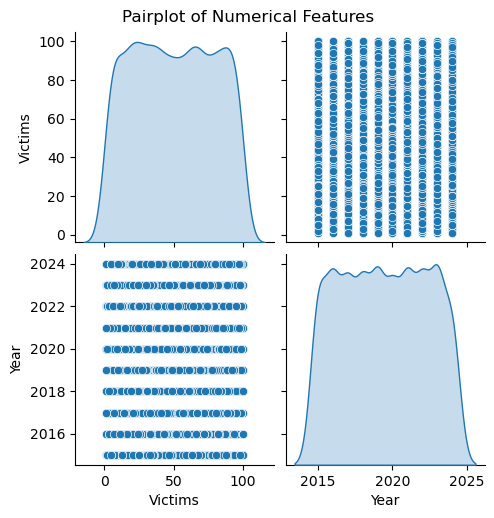

In [288]:
# Explore relationships between numerical features (e.g., number of victims and other possible metrics).

sns.pairplot(data[['Victims', 'Year']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


# Insights from the Human Rights Violations Analysis
Based on the dataset and visualizations created:

1. Most Common Human Rights Violations
Insight: Certain types of violations are significantly more prevalent than others, as seen in the bar plot and pie chart.

Recommendation:
Focus resources and interventions on addressing the most common violations.
Implement specific policies or campaigns targeting these issues.

3. Regional Disparities
Insight: Some regions experience disproportionately high levels of human rights violations. For instance, regions like Nairobi and Mombasa may show higher counts due to population density or unique local issues.
Recommendation:
Tailor interventions to the specific needs of each region.
Increase funding for human rights programs in regions with the highest violation counts.

4. Yearly Trends in Violations
Insight: The line chart of yearly trends reveals whether the number of victims is increasing, decreasing, or fluctuating over time.
Recommendation:
Investigate years with significant spikes in violations to identify underlying causes.
Monitor the effectiveness of implemented policies over time and adjust them accordingly.

5. Victims by Violation Type
Insight: The box plot shows a wide variation in the number of victims per violation type, with some violations affecting significantly more people.
Recommendation:
Prioritize violations that result in the highest number of victims for immediate attention.
Conduct in-depth studies to understand why some violations are more severe in terms of victim count.

6. Geographic Insights from Map
Insight: The folium map highlights geographic clusters of violations, showing where human rights challenges are concentrated.
Recommendation:
Deploy mobile justice units or field offices in hotspots to provide rapid responses.
Collaborate with local governments and NGOs in high-violation regions to improve reporting mechanisms and victim support.

7. Correlation Insights
Insight: Correlation analysis may reveal relationships between variables, such as whether population density or economic factors are linked to higher violation rates.
Recommendation:
Use these correlations to inform targeted policy interventions.
Combine datasets (e.g., socio-economic or demographic data) for more comprehensive analyses.

8. Gender-Based Trends (If Included)
Insight: Violations may disproportionately affect certain groups, such as women or children.
Recommendation:
Develop programs addressing vulnerabilities of specific groups.
Promote gender-sensitive policies and empower women and children through education and advocacy.

General Recommendations
Awareness and Advocacy:

Launch awareness campaigns about human rights issues in the most affected areas.
Partner with media outlets to disseminate information.
Strengthening Institutions:

Bolster local human rights organizations and law enforcement to address violations more effectively.
Train local officials to recognize and respond to human rights abuses.
Reporting and Transparency:

Improve reporting mechanisms to ensure accurate data collection.
Use technology (e.g., apps or hotlines) to encourage victims to report violations.
Policy Reforms:

Advocate for stronger laws against human rights violations.
Enforce existing laws more rigorously.
International Collaboration:

Seek assistance from international organizations to combat widespread violations.
Use international frameworks like the UN's Universal Declaration of Human Rights for benchmarking.

Conclusion
This project highlights critical areas where human rights violations are prevalent, allowing for data-driven decision-making. By focusing on the most common violations, regional disparities, and trends over time, stakeholders can create targeted and effective strategies to combat human rights abuses in Kenya.






